<h2>GRUs and LSTMs</h2>

<h3>GRU (Gated Recurrent Unit)</h3>

<h4 align="center">RNN Formula</4>

$$h_t = \sigma(W_{xh}^{T}x_t + W_{hh}^{T}h_{t-1}+b_{h})$$

<h4 align="center">GRU Formulae</4>

$$ z_{t} = \sigma(W_{xz}^{T}x_t + W_{hz}^{T}h_{t-1}+b_{z})$$
$$ r_{t} = \sigma(W_{xr}^{T}x_t + W_{hr}^{T}h_{t-1}+b_{r})$$
$$ h_{t} = (1-z_{t})\odot h_{t-1} + z_{t} \odot tanh(W_{xh}^{T}x_{t} + W_{hh}^{T}(r_{t} \odot h_{t-1})+b_{h})$$
<h4></h4>
<ul>
<li>z(t) = update the gate vector</li>
<li>r(t) = reset gate vector</li>
<li>h(t) = hidden state</li>
</ul>

<h3>Shapes</h3>

<li>z(t), r(t), and h(t) are all vectors of size M</li>
<li>M is a hyperparameter (number of hidden unites)</li>
<li>Any weight from x(t) is DxM</li>
<li>Any weight going from h(t) is MxM</li>
<li>All bias terms are of size M</li>

<h3>GRU vs LSTM</h3>
<li> They don't have the same API</li>
<li> LSTM returns 2 states:</br>
- Hidden states h(t)</br>
- Cell state c(t) 
</li>
<img src="GRU vs LSTM states.png"></img>

<h2>LSTM Equations</h2>

<img src="lstm_equations.png"></img>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex

from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

<IPython.core.display.Latex object>

Text(0.5, 1.0, '$x(t) = sin(wt^2)$')

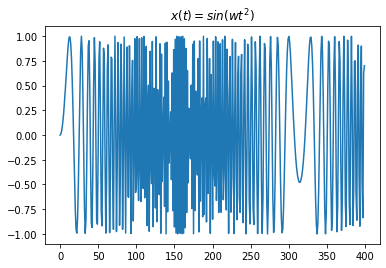

In [2]:
# creating synthetic data
display(Latex(r"$x(t) = sin(wt^2)$"))
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.title(r"$x(t) = sin(wt^2)$")

In [5]:
# using T values to predict the next value
T = 10 # sequence length
D = 1 # one feature
K = 1 # output units
M = 5 # hidden units

X = []
Y = [] 
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(390, 10)
(390,)
